<a href="https://colab.research.google.com/github/Ananya45678/Machine-Learning-Codes/blob/main/ML_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import files
uploaded = files.upload()

Saving Lab Session Data.xlsx to Lab Session Data (1).xlsx


In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

**QUESTION 1.**

Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data
and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following
activities.

In [3]:
sheet_name = "Purchase data"
df = pd.read_excel("Lab Session Data.xlsx", sheet_name = sheet_name)
df = df.dropna(axis=1, how='all')

A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()
C = df[['Payment (Rs)']].to_numpy()

print("Matrix A: ", A)
print("Matrix C: ", C)

Matrix A:  [[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Matrix C:  [[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]


What is the dimensionality of the vector space for this data?

In [4]:
dimensionality = A.shape[1]
print("Dimensionality of the vector space:", dimensionality)

Dimensionality of the vector space: 3


How many vectors exist in this vector space?


In [5]:
num_vectors = A.shape[0]
print("Number of vectors in the vector space:", num_vectors)

Number of vectors in the vector space: 10


What is the rank of Matrix A?

In [6]:
rank_A = np.linalg.matrix_rank(A)
print("Rank of Matrix A:", rank_A)

Rank of Matrix A: 3


Using Pseudo-Inverse find the cost of each product available for sale.

In [7]:
X = np.linalg.pinv(A) @ C
print("Cost per unit of Candies, Mangoes, and Milk Packets:")
print(X)

Cost per unit of Candies, Mangoes, and Milk Packets:
[[ 1.]
 [55.]
 [18.]]


**QUESTION 2.**

Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products
available with the vendor.


In [8]:
X = np.linalg.pinv(A) @ C
print("Model vector X (Cost per unit of Candies, Mangoes, and Milk Packets):")
print(X)

Model vector X (Cost per unit of Candies, Mangoes, and Milk Packets):
[[ 1.]
 [55.]
 [18.]]


**QUESTION 3.**

 Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others
as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on
purchase behavior.

In [9]:
df['Customer_Class'] = ['RICH' if x > 200 else 'POOR' for x in df['Payment (Rs)']]

X_features = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y_target = df['Customer_Class']

label_encoder = LabelEncoder()
y_target_encoded = label_encoder.fit_transform(y_target)

model = LogisticRegression(max_iter = 1000)
model.fit(X_features, y_target_encoded)

df['Predicted_Class'] = ['RICH' if x else 'POOR' for x in model.predict(X_features)]
print(df[['Predicted_Class']])

  Predicted_Class
0            RICH
1            RICH
2            RICH
3            POOR
4            RICH
5            POOR
6            RICH
7            RICH
8            POOR
9            POOR


**QUESTION 4.**

Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the
following after loading the data to your programming platform.


In [30]:
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price").dropna(axis=1, how='all')
df['Date'] = pd.to_datetime(df['Date'])

Calculate the mean and variance of the Price data present in column D.

In [31]:
mean_price = statistics.mean(df['Price'])
variance_price = statistics.variance(df['Price'])
print("Mean of Price:", mean_price)
print("Variance of Price:", variance_price)

Mean of Price: 1560.663453815261
Variance of Price: 58732.365352539186


Select the price data for all Wednesdays and calculate the sample mean. Compare the mean
with the population mean and note your observations.

In [32]:
wednesday_prices = df[df['Day'] == 'Wed']['Price']
wednesday_mean = statistics.mean(wednesday_prices)
print("Mean of Wednesday Prices:", wednesday_mean)
print("Difference from Population Mean:", abs(mean_price - wednesday_mean))

Mean of Wednesday Prices: 1550.706
Difference from Population Mean: 9.957453815261033


Select the price data for the month of Apr and calculate the sample mean. Compare the
mean with the population mean and note your observations.

In [33]:
april_prices = df[df['Month'] == 'Apr']['Price']
april_mean = statistics.mean(april_prices)
print("Mean of April Prices:", april_mean)
print("Difference from Population Mean:", abs(mean_price - april_mean))

Mean of April Prices: 1698.9526315789474
Difference from Population Mean: 138.28917776368644


From the Chg% (available in column I) find the probability of making a loss over the stock.

In [34]:
prob_loss = sum(df['Chg%'] < 0) / len(df)
print("Probability of Loss:", prob_loss)

Probability of Loss: 0.4979919678714859


Calculate the probability of making a profit on Wednesday.


In [35]:
wednesday_profit = sum((df['Day'] == 'Wed') & (df['Chg%'] > 0)) / sum(df['Day'] == 'Wed')
print("Probability of Profit on Wednesday:", wednesday_profit)

Probability of Profit on Wednesday: 0.42


Calculate the conditional probability of making profit, given that today is Wednesday.

In [36]:
prob_profit_given_wed = wednesday_profit / (sum(df['Chg%'] > 0) / len(df))
print("Conditional Probability of Profit given Wednesday:", prob_profit_given_wed)

Conditional Probability of Profit given Wednesday: 0.8433870967741935


Make a scatter plot of Chg% data against the day of the week

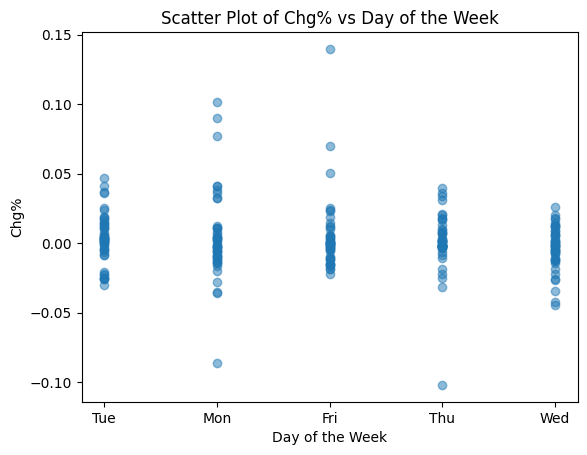

In [37]:
plt.scatter(df['Day'], df['Chg%'], alpha=0.5)
plt.xlabel("Day of the Week")
plt.ylabel("Chg%")
plt.title("Scatter Plot of Chg% vs Day of the Week")
plt.show()

**QUESTION 5.**

Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the
following tasks:

In [38]:
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI").dropna(axis=1, how='all')

Study each attribute and associated values present. Identify the datatype (nominal etc.)
for the attribute.

In [39]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured   

For categorical attributes, identify the encoding scheme to be employed.

In [40]:
categorical_columns = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                        'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                        'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
                        'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
                        'TBG measured', 'referral source', 'Condition']
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))

Study the data range for numeric variables.

In [41]:
print("\nData Range for Numeric Variables:")
for col in numeric_columns:
    print(f"{col}: Min = {df[col].min(skipna=True)}, Max = {df[col].max(skipna=True)}")


Data Range for Numeric Variables:
age: Min = 1, Max = 65526
TSH: Min = 0.005, Max = 530.0
T3: Min = 0.05, Max = 18.0
TT4: Min = 2.0, Max = 600.0
T4U: Min = 0.17, Max = 2.33
FTI: Min = 1.4, Max = 881.0
TBG: Min = 0.1, Max = 200.0


Study the presence of missing values in each attribute.

In [42]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Record ID                       0
age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG                          88

Study presence of outliers in data.

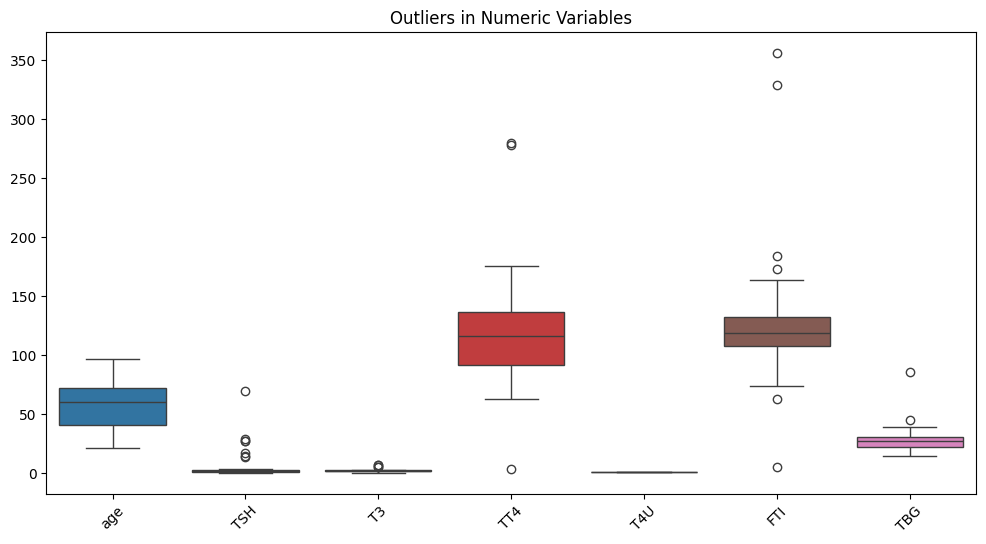

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_columns].dropna())
plt.title("Outliers in Numeric Variables")
plt.xticks(rotation=45)
plt.show()

For numeric variables, calculate the mean and variance (or standard deviation).

In [44]:
print("\nMean and Standard Deviation:")
for col in numeric_columns:
    valid_values = df[col].dropna()
    if not valid_values.empty:
        print(f"{col}: Mean = {statistics.mean(valid_values)}, Std Dev = {statistics.stdev(valid_values)}")


Mean and Standard Deviation:
age: Mean = 73.55582206716092, Std Dev = 1183.9767180444658
TSH: Mean = 5.218402753781513, Std Dev = 24.184006144749688
T3: Mean = 1.9706288057247259, Std Dev = 0.8875788237425203
TT4: Mean = 108.70030469644902, Std Dev = 37.52267036706589
T4U: Mean = 0.9760557216309936, Std Dev = 0.20036044118054985
FTI: Mean = 113.64074551935484, Std Dev = 41.551649606978955
TBG: Mean = 29.87005729512894, Std Dev = 21.08050386018955


**QUESTION 6.**

Data Imputation: employ appropriate central tendencies to fill the missing values in the data
variables. Employ following guidance.



*   Mean may be used when the attribute is numeric with no outliers

*   Median may be employed for attributes which are numeric and contain outliers
*   Mode may be employed for categorical attributes







Missing Values after Imputation:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype

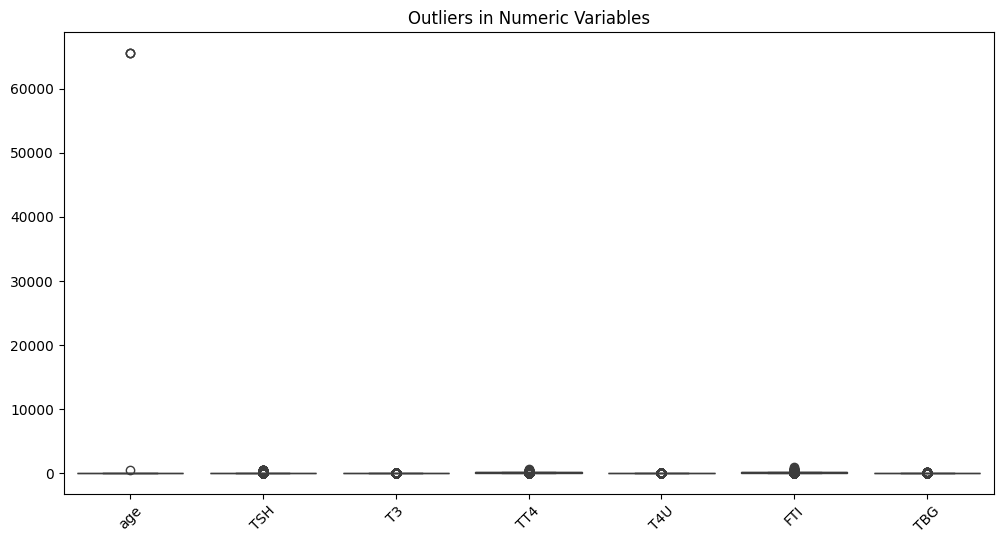

In [45]:
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI").dropna(axis=1, how='all')

categorical_columns = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                        'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                        'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
                        'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
                        'TBG measured', 'referral source', 'Condition']
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

outliers = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()

for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        if outliers[col] == 0:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].median())

for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing Values after Imputation:")
print(df.isnull().sum())

plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_columns])
plt.title("Outliers in Numeric Variables")
plt.xticks(rotation=45)
plt.show()

**QUESTION 7.**

Data Normalization / Scaling: from the data study, identify the attributes which may need
normalization. Employ appropriate normalization techniques to create normalized set of data.


Normalized Data Sample:
        age       TSH        T3       TT4       T4U       FTI       TBG
0  0.000427  0.000557  0.103064  0.170569  0.365741  0.122328  0.129565
1  0.000427  0.003009  0.103064  0.210702  0.365741  0.122328  0.129565
2  0.000610  0.002632  0.103064  0.170569  0.365741  0.122328  0.054527
3  0.000534  0.002632  0.103064  0.170569  0.365741  0.122328  0.129565
4  0.000473  0.002632  0.103064  0.170569  0.365741  0.122328  0.179590


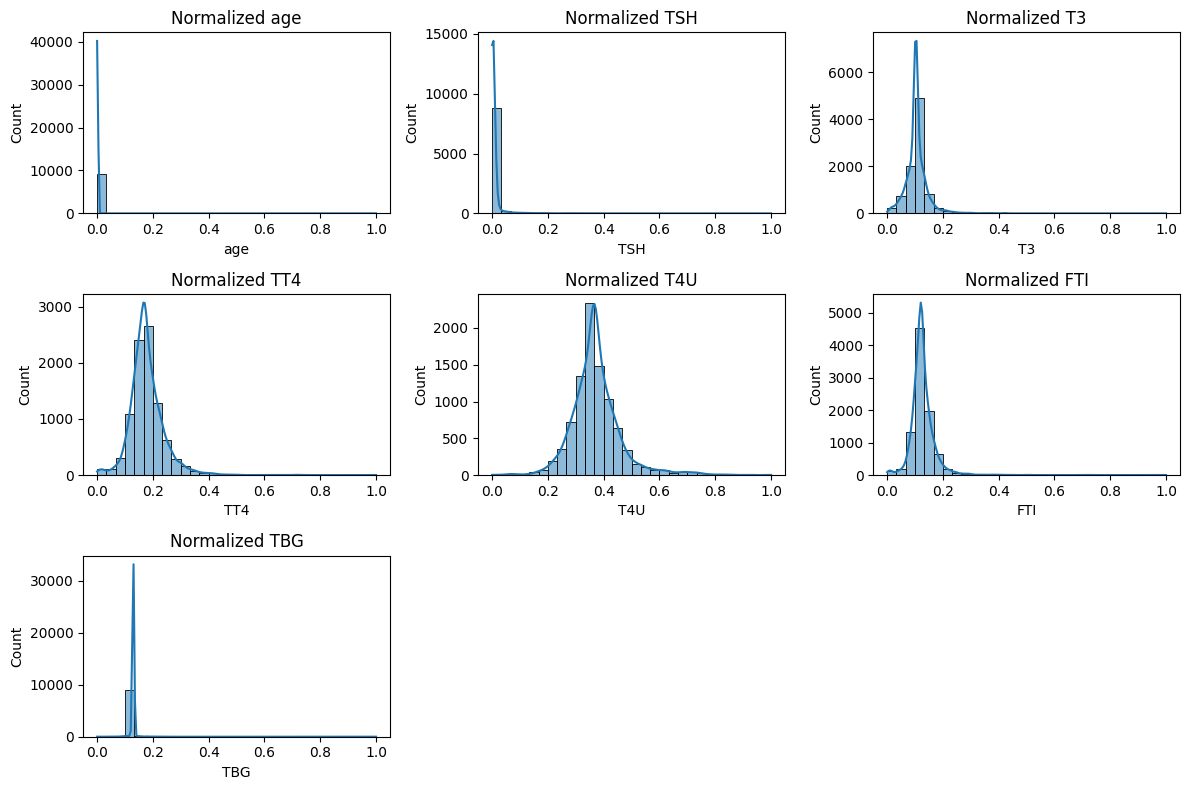

In [46]:
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

scaler_standard = StandardScaler()
standardized_data = pd.DataFrame(scaler_standard.fit_transform(df[numeric_columns]), columns=numeric_columns)

scaler_minmax = MinMaxScaler()
normalized_data = pd.DataFrame(scaler_minmax.fit_transform(df[numeric_columns]), columns=numeric_columns)

df_normalized = df.copy()
for col in numeric_columns:
    if df[col].skew() < 1:
        df_normalized[col] = standardized_data[col]
    else:
        df_normalized[col] = normalized_data[col]

print("\nNormalized Data Sample:")
print(df_normalized[numeric_columns].head())

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_normalized[col], bins=30, kde=True)
    plt.title(f"Normalized {col}")

plt.tight_layout()
plt.show()


**QUESTION 8.**

Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the
attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate
the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors.
Use first vector for each document for this. Compare the values for JC and SMC and judge the
appropriateness of each of them

In [47]:
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
df_binary = df[binary_columns]

vector1 = df_binary.iloc[0].values
vector2 = df_binary.iloc[1].values

f11 = np.sum((vector1 == 1) & (vector2 == 1))
f00 = np.sum((vector1 == 0) & (vector2 == 0))
f01 = np.sum((vector1 == 0) & (vector2 == 1))
f10 = np.sum((vector1 == 1) & (vector2 == 0))

if (f01 + f10 + f11) == 0:
    jc = 0
else:
    jc = f11 / (f01 + f10 + f11)

if (f00 + f01 + f10 + f11) == 0:
    smc = 0
else:
    smc = (f11 + f00) / (f00 + f01 + f10 + f11)

print(f"Jaccard Coefficient (JC): {jc:.4f}")
print(f"Simple Matching Coefficient (SMC): {smc:.4f}")

if jc > smc:
    print("Jaccard Coefficient is more appropriate for this case (ignores f00).")
else:
    print("Simple Matching Coefficient is more appropriate for this case (considers f00).")

Jaccard Coefficient (JC): 0.0000
Simple Matching Coefficient (SMC): 0.0000
Simple Matching Coefficient is more appropriate for this case (considers f00).


**QUESTION 9.**

Cosine Similarity Measure: Now take the complete vectors for these two observations (including
all the attributes). Calculate the Cosine similarity between the documents by using the second
feature vector for each document.

In [48]:
df_numeric = df.select_dtypes(include=['number']).copy()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df_numeric = df.select_dtypes(include=['number']).copy()

vector1 = df_numeric.iloc[0].values.reshape(1, -1)
vector2 = df_numeric.iloc[1].values.reshape(1, -1)

cos_sim = cosine_similarity(vector1, vector2)[0][0]

print(f"Cosine Similarity: {cos_sim:.4f}")

Cosine Similarity: 1.0000


**QUESTION 10.**

 Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS
between the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient
calculation as in A4 & A5. Employ a heatmap plot to visualize the similarities.

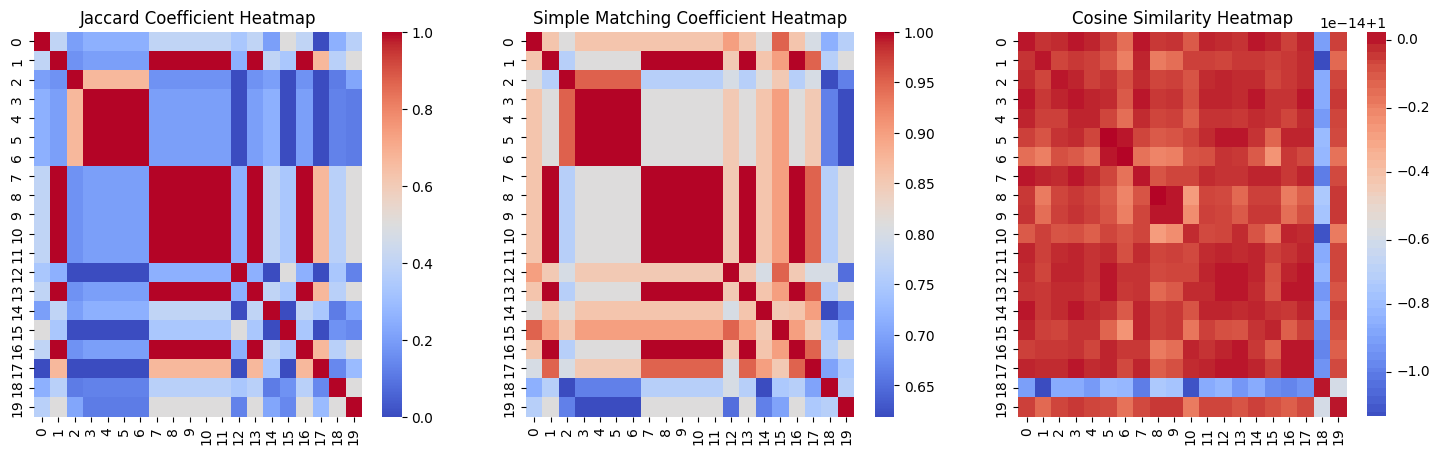

In [26]:
df_20 = df.iloc[:20].copy()

binary_cols = df_20.select_dtypes(include=['object', 'bool']).columns
numeric_cols = df_20.select_dtypes(include=['number']).columns

for col in binary_cols:
    df_20[col] = LabelEncoder().fit_transform(df_20[col].astype(str))

df_numeric_20 = df_20[numeric_cols].copy()

def calculate_jc_smc(vec1, vec2):
    f11 = np.sum((vec1 == 1) & (vec2 == 1))
    f10 = np.sum((vec1 == 1) & (vec2 == 0))
    f01 = np.sum((vec1 == 0) & (vec2 == 1))
    f00 = np.sum((vec1 == 0) & (vec2 == 0))

    jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
    smc = (f11 + f00) / (f11 + f10 + f01 + f00)

    return jc, smc

jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cos_matrix = cosine_similarity(df_numeric_20)

for i in range(20):
    for j in range(20):
        jc, smc = calculate_jc_smc(df_20.iloc[i], df_20.iloc[j])
        jc_matrix[i, j] = jc
        smc_matrix[i, j] = smc

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(jc_matrix, annot=False, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Jaccard Coefficient Heatmap")

sns.heatmap(smc_matrix, annot=False, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Simple Matching Coefficient Heatmap")

sns.heatmap(cos_matrix, annot=False, cmap="coolwarm", ax=axes[2])
axes[2].set_title("Cosine Similarity Heatmap")

plt.show()
